In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка данных

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


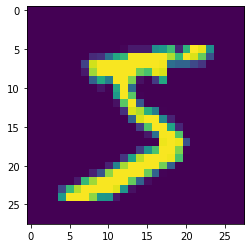

In [5]:
plt.imshow(x_train[0].squeeze())
plt.show()

Нормализация

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Создание модели

In [7]:
model = Sequential()
model.add(Conv2D(75, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучение

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 15s 7ms/step - loss: 0.2198 - accuracy: 0.9306 - val_loss: 0.0555 - val_accuracy: 0.9838
Epoch 2/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 3/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0369 - val_accuracy: 0.9901
Epoch 4/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 5/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0327 - val_accuracy: 0.9903
Epoch 6/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 7/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0319 - val_accuracy: 0.9908
Epoch

Проверка

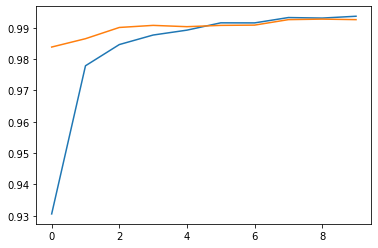

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [11]:
scores = model.evaluate(x_test, y_test)
print(round(scores[1]*100, 4))

313/313 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9921
99.21


7


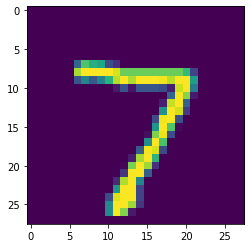

In [12]:
pred = model.predict(x_test)
n = 0
print(np.argmax(pred[n]))
plt.imshow(x_test[n].squeeze())
plt.show()